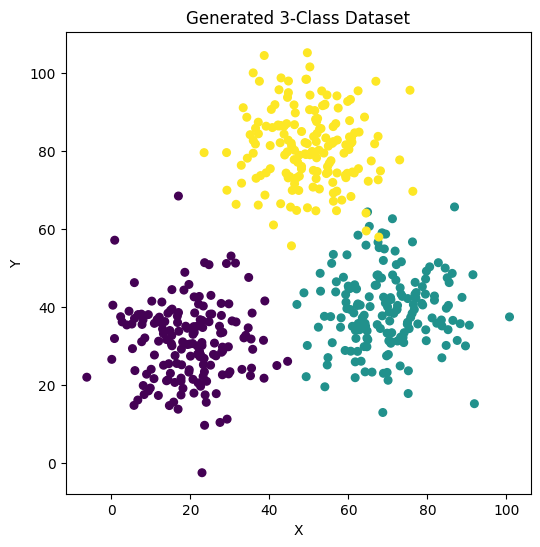

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# 3 clusters for 3 classes
n = 500 // 3

# Class 0
x0 = np.random.normal(20, 10, n)
y0 = np.random.normal(30, 10, n)
label0 = np.zeros(n)

# Class 1
x1 = np.random.normal(70, 10, n)
y1 = np.random.normal(40, 10, n)
label1 = np.ones(n)

# Class 2
x2 = np.random.normal(50, 10, n)
y2 = np.random.normal(80, 10, n)
label2 = np.full(n, 2)

# Combine
X = np.concatenate([x0, x1, x2])
Y = np.concatenate([y0, y1, y2])
LABEL = np.concatenate([label0, label1, label2])

df = pd.DataFrame({"X": X, "Y": Y, "LABEL": LABEL.astype(int)})

plt.figure(figsize=(6,6))
plt.scatter(df["X"], df["Y"], c=df["LABEL"], cmap="viridis", s=30)
plt.title("Generated 3-Class Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Epoch 0, Loss: 1.0985
Epoch 20, Loss: 1.0984
Epoch 40, Loss: 1.0984
Epoch 60, Loss: 1.0984
Epoch 80, Loss: 1.0983
Epoch 100, Loss: 1.0983
Epoch 120, Loss: 1.0982
Epoch 140, Loss: 1.0981
Epoch 160, Loss: 1.0980
Epoch 180, Loss: 1.0979
Epoch 200, Loss: 1.0978
Epoch 220, Loss: 1.0977
Epoch 240, Loss: 1.0975
Epoch 260, Loss: 1.0973
Epoch 280, Loss: 1.0971


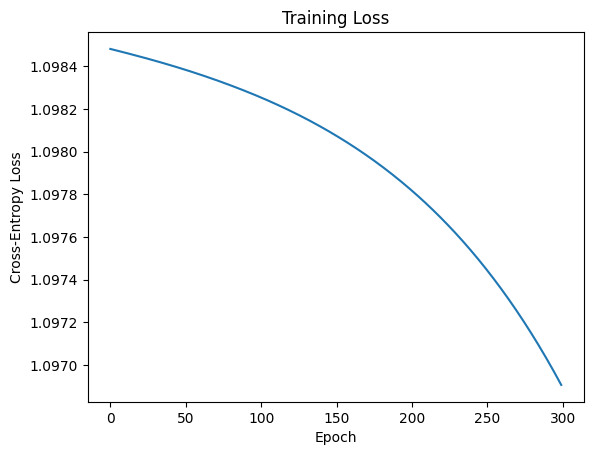

In [15]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Prepare data
X = df[["X", "Y"]].values
Y = df["LABEL"].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
Y_onehot = encoder.fit_transform(Y)

# Network architecture
input_size = 2
hidden_size = 5
output_size = 3
lr = 0.01
epochs = 300

# Weight initialization
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

def softmax(z):
    exp = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

# Training
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # Compute loss (cross entropy)
    loss = -np.mean(np.sum(Y_onehot * np.log(A2 + 1e-8), axis=1))
    losses.append(loss)

    # Backpropagation
    dZ2 = A2 - Y_onehot
    dW2 = np.dot(A1.T, dZ2) / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.show()


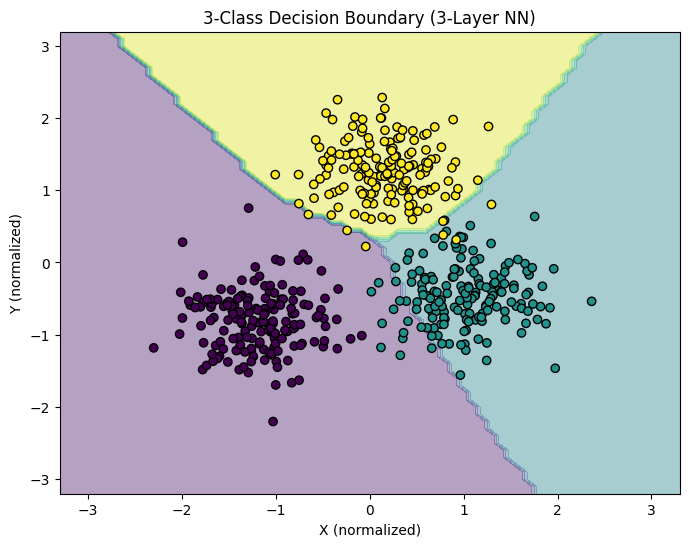

In [16]:
# Decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
Z1 = np.dot(grid, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
preds = np.argmax(softmax(Z2), axis=1)
preds = preds.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, preds, cmap="viridis", alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=df["LABEL"], cmap="viridis", edgecolors='k')
plt.title("3-Class Decision Boundary (3-Layer NN)")
plt.xlabel("X (normalized)")
plt.ylabel("Y (normalized)")
plt.show()
